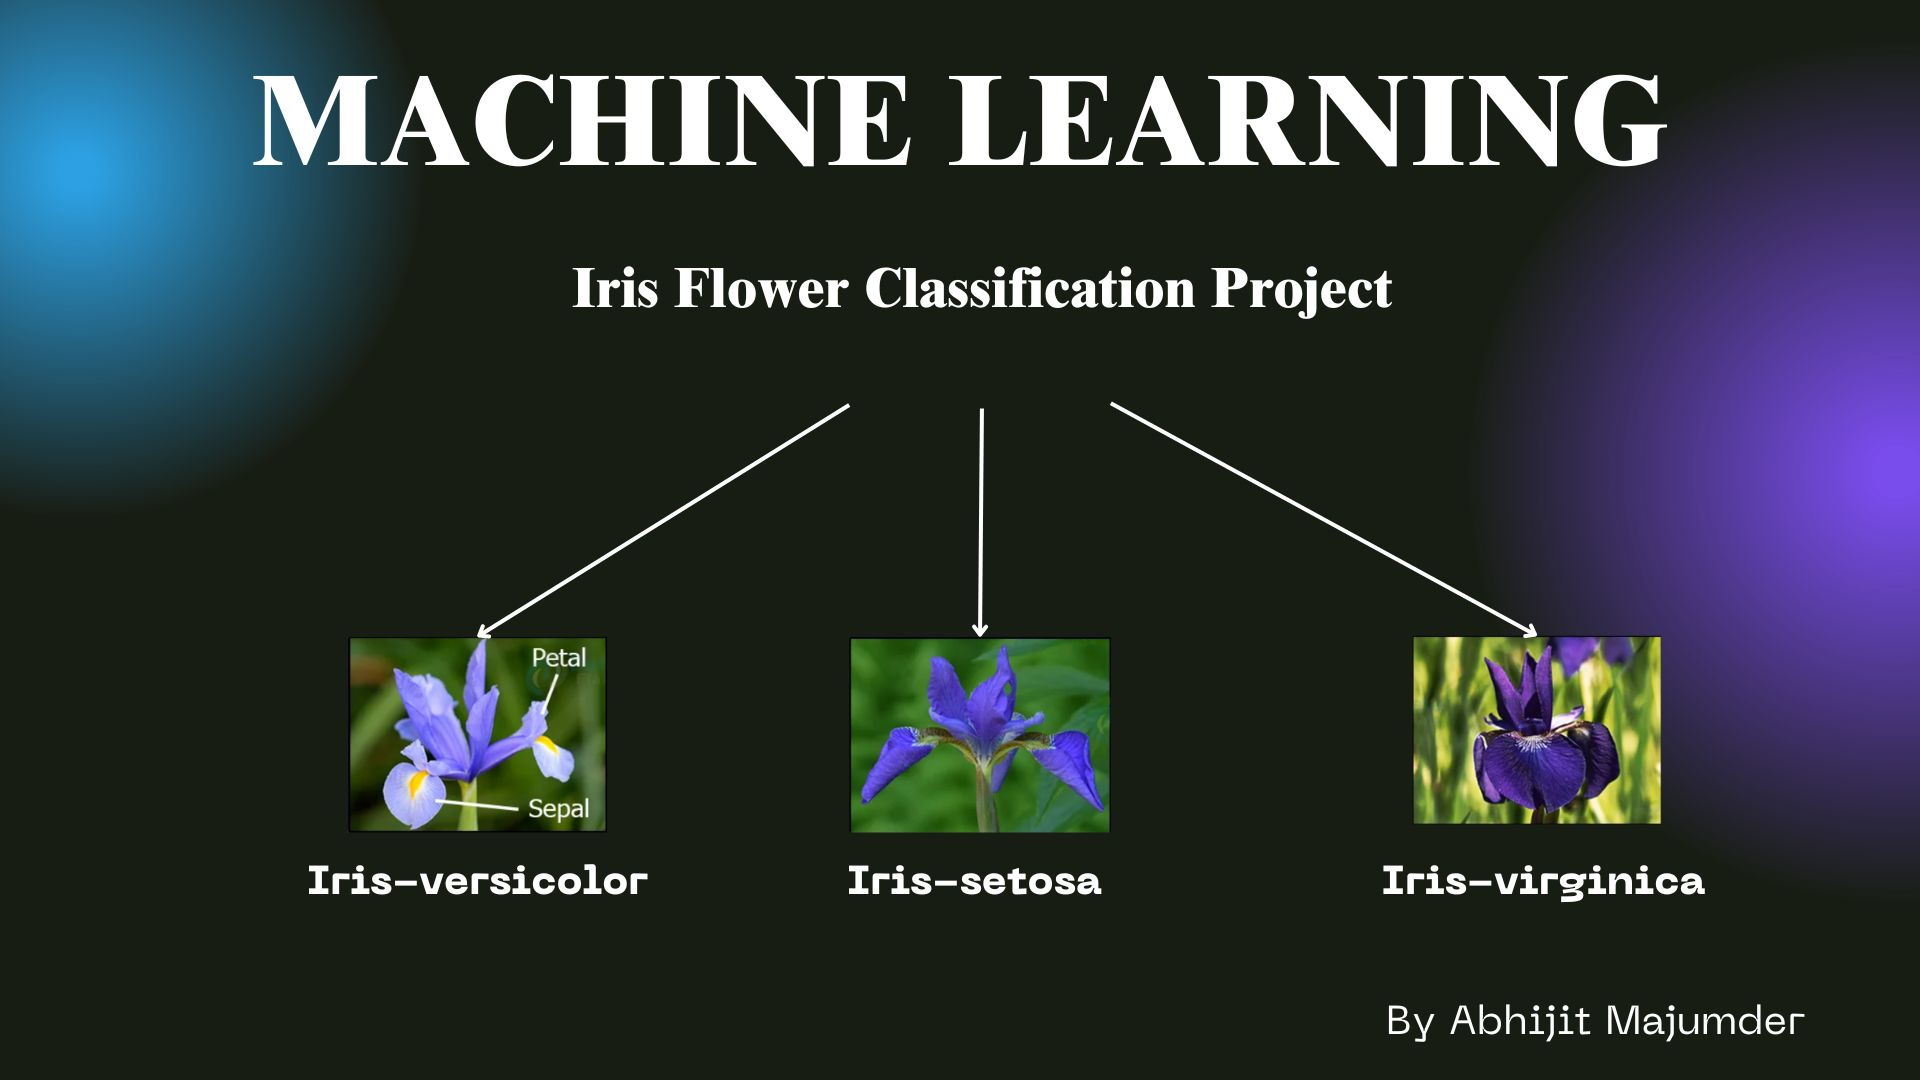

### Required Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Load The Dataset 

In [2]:
dataset = pd.read_csv("IRIS.csv")

In [3]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# display stats about the data
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Display basic info about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dataset['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
# Check for null value
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

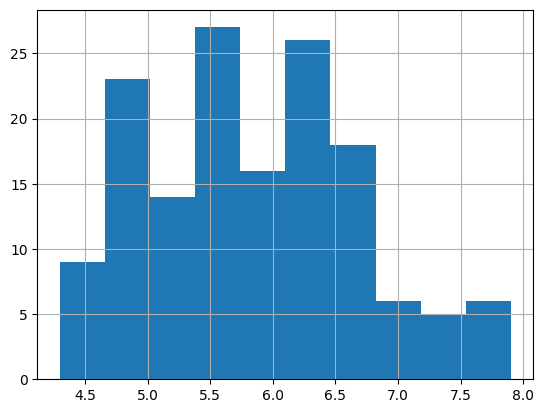

In [8]:
dataset['sepal_length'].hist()

<Axes: >

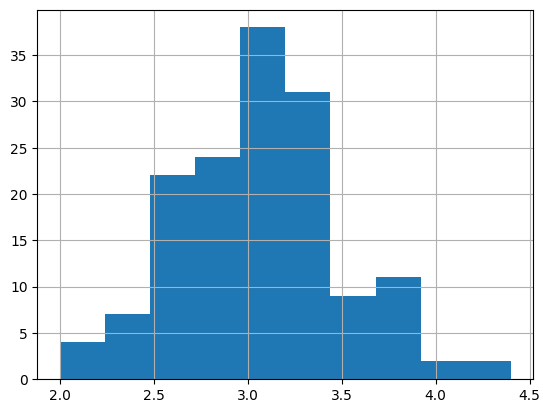

In [9]:
dataset['sepal_width'].hist()

<Axes: >

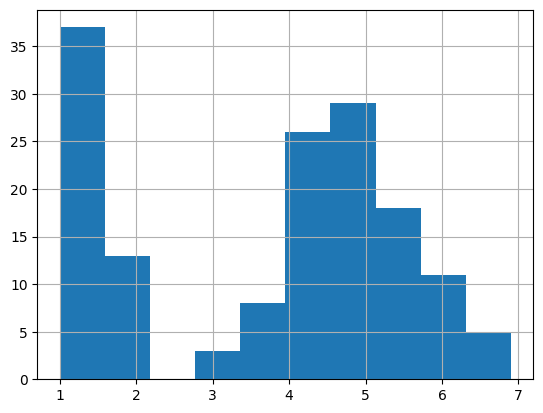

In [10]:
dataset['petal_length'].hist()

<Axes: >

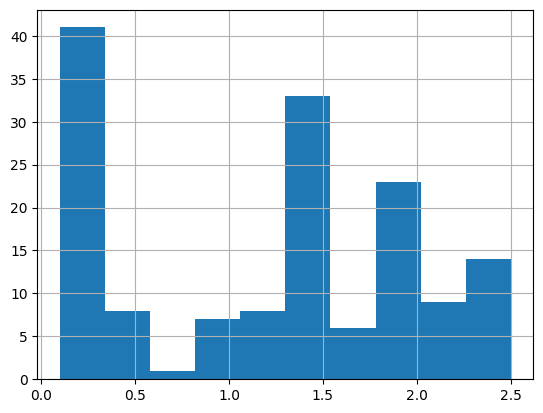

In [11]:
dataset['petal_width'].hist()

In [12]:
# scatterplot
colors =['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

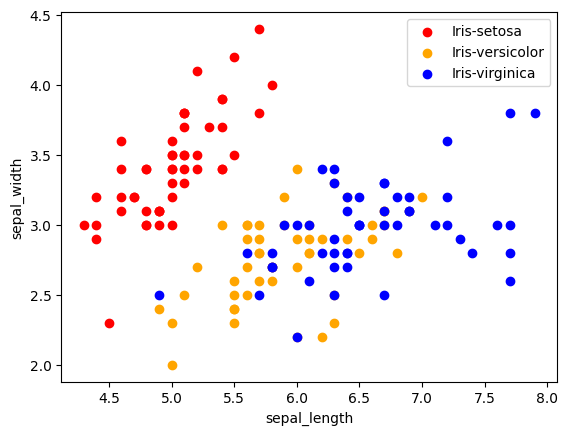

In [13]:
for i in range(3):
    x= dataset[dataset['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c= colors[i], label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()

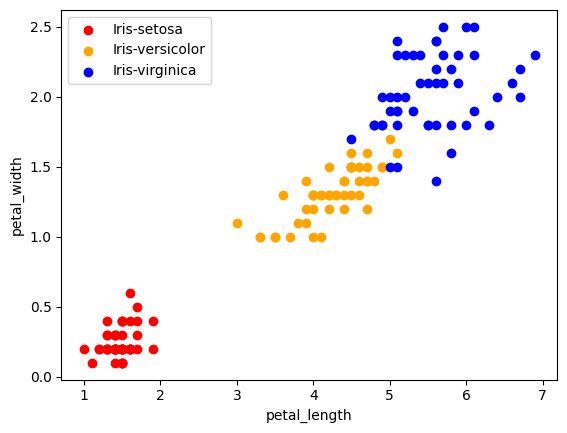

In [14]:
for i in range(3):
    x= dataset[dataset['species'] == species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c= colors[i], label=species[i])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()

In [15]:
data=dataset

In [16]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
data=data.drop("species",axis=1)

In [18]:
# coorelation Matrix
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

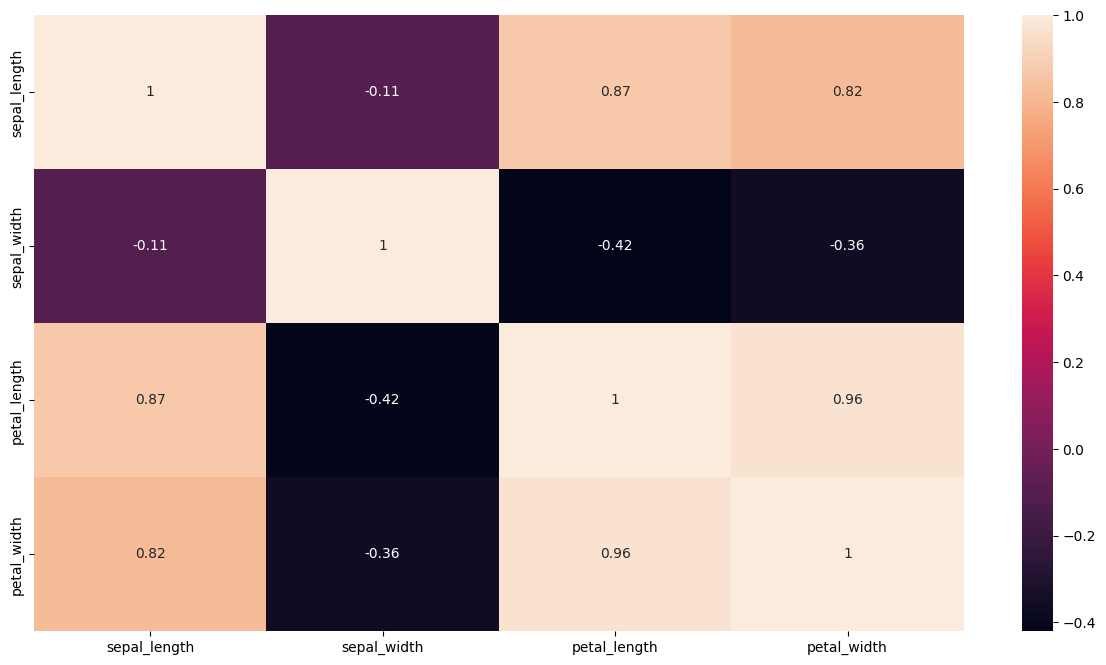

In [19]:
corr=data.corr()
fig,ax = plt.subplots(figsize=(15,8))
sns.heatmap(corr,annot=True,)

In [20]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [21]:
dataset['species'] = label.fit_transform(dataset['species'])

In [22]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Split The Dataset into two part 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x= dataset.drop(columns=['species'])
y= dataset['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### Train the model using LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
model.fit(x_train,y_train)

LogisticRegression()

### Check the accuracy of model

In [27]:
model.score(x_test,y_test)

0.9666666666666667

### Train the model using KNeighborsClassifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
new_Model = KNeighborsClassifier()

In [29]:
new_Model.fit(x_train,y_train)

KNeighborsClassifier()

### Check the accuracy of model

In [30]:
new_Model.score(x_test,y_test)

0.9666666666666667

### Train the model using DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree_Model= DecisionTreeClassifier()

In [32]:
tree_Model.fit(x_train,y_train)

DecisionTreeClassifier()

### Check the accuracy of model

In [33]:
tree_Model.score(x_test,y_test)

0.9666666666666667